<a href="https://colab.research.google.com/github/Harklink/machine-learning-for-networks/blob/master/TP_Detection_anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Détection d'anomalies sur des données réseau


## Contexte



### Problème
Vous recevez un ticket "My team reported that internet is very slow lately, please do the necessary" d'un manager non identifié le 16 Mai.
Vous disposez des données de l'infrastructure C&Solve pour ce client du 2020-05-14 00:00 au 2020-05-15 23:59 (48h). Grace a ces données vous devez trouver l'incident ayant eu lieu sur cette periode et proposer une analyse du phénomene réseau l'ayant causé.


### Sites Client
['herblay', 'colombus', 'romano', 'milton_2', 'gennevilliers',
 'vejle', 'poznan', 'manzanares', 'azuqueca', 'jasin', 'shangai', 'san_esteban',
 'oslo', 'hongkong', 'bolton', 'castanheira', 'bankstown', 'kansas_city',
 'fort_smith', 'kansas_city_punch', 'badlauterberg', 'molnlycke', 'la_cartuja', 'buedingen',
 'lille', 'lampeter', 'salina', 'los_angeles', 'milton', 'trafford_park']

 Les sites peuvent heberger des utilisateurs et/ou des services.

### Apps Client
['pingfederate' 'wpad' 'drive' 'sap_ariba' 'pweb' 'sharepoint' 'gmail'
 'intelex' 'zscaler_gateway' 'teamsrooms' 'servicenow' 'europefa_prod'
 'salesforce' 'fuze_me' 'europefaprot']


### Infos supplémentaires
* Certaines App sont hebergé en interne.
* La sonde ayant effectuée les mesure tourne sur linux.
* La sonde effectue une mesure de latence environ toute les 2 minutes.

### Données

* Données rééchantillonées sur 2 minutes avec un fill-forward (si donnée absente prendre la dernière connue).
* 1 CSV = 1 paire Site/App. ex : san_esteban-pingfederate.csv
* Colonnes : @timestamp,latency.dns,latency.serv,latency.tls,latency.content,latency.tcp,latency.total
  *   @timestamp = Temps de la mesure ex: 2020-05-14 00:00:00+00:00
  *   latency.dns = Temps de la résolution DNS (en ms)
  *   latency.tcp = Temps de la connection TCP (en ms)
  *   latency.tls = Temps de la négociation TLS (en ms)
  *   latency.serv = Temps de latence serveur (en ms)
  *   latency.content = Temps de téléchargement du contenu (en ms)
  *   latency.total = Temps de latence total (en ms)






## 1ere étape : importer les données

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1hI89q2QvdxYS4ZIYFDBTo10APircmCgL'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('timeseries.zip')
!unzip timeseries.zip
!mkdir timeseries
!mv *.csv ./timeseries/


## 2eme étape : Se les approprier


### Prerequis
(On installe la dernière release de plotly pour avoir le backend integré à pandas)

In [ ]:
!pip install plotly==5.8.0
import plotly
import pandas as pd
pd.options.plotting.backend = "plotly"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Afficher les graphes de latence des paires APP/Site
On commence par afficher quelque graphs pour comprendre la donnée. On cherche un bon cas et un mauvais cas de manière a avoir une idée de ce a quoi cela va ressembler.

In [ ]:
dfs = []
sites = ['herblay', 'colombus']
apps = ['pingfederate', 'wpad']
for site in sites :
  for app in apps:
    df = pd.read_csv(f"./timeseries/{site}-{app}.csv", low_memory=False, parse_dates=["@timestamp"], keep_date_col=False)
    df["site"], df["app"] = site, app
    dfs.append(df)
df = pd.concat(dfs) # on a chargé les données des graphes des sites

In [ ]:
fig = df.plot(x='@timestamp', y=df["latency.total"], facet_row="app", facet_col = "site", height=len(apps)*250, facet_row_spacing=0.01, facet_col_spacing=0.01)

fig.update_yaxes(matches=None)
fig.show()

### Trouver un "bon" graph

In [ ]:
df = pd.read_csv("./timeseries/???.csv", low_memory=False, parse_dates=["@timestamp"], keep_date_col=False)
fig = df.plot(x='@timestamp', y=df.columns[1:])

fig.show()

> Methode et analyse ?

### Trouver un "mauvais" graph

In [ ]:
df = pd.read_csv("./timeseries/???.csv", low_memory=False, parse_dates=["@timestamp"], keep_date_col=False)
fig = df.plot.scatter(x='@timestamp', y=df.columns[1:])

fig.show()

> Methode et analyse ?

### Trouver un graph avec un incident

In [ ]:
df = pd.read_csv("./timeseries/???.csv", low_memory=False, parse_dates=["@timestamp"], keep_date_col=False)
fig = df.plot(x='@timestamp', y=df.columns[1:])

fig.show()

> Methode et analyse ?

# Pause Echange

Exprimez vous svp

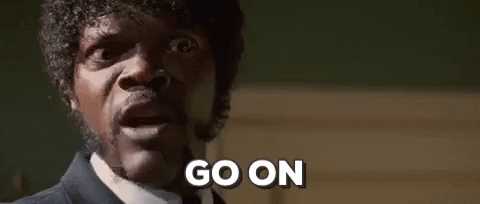

